# This code was developed for the "SOCIAL IMPACT HACKATHON Analyzing our Environmental Tweet-Bank".
## Final results: We won the "Popular Vote" as well as the "Silver Badge"

This part of the solution is for NLP and Analytics
webapp: https://github.com/aelnahas/greentweets
https://greentweets.netlify.app/

The questions such as should they use more positive results-oriented message? or more eventpromossion vs data related posts? seems like NLP Sentiment Analysis to me. So I used textblob library

In [1]:
import pandas as pd
import re

In [2]:
df = pd.read_csv(r'C:\Users\Taha\Desktop\Hackathon\tweets.csv')

In [5]:
df.head()

,id,tweets,likes,retweets,Tweet_Score,time,followers,friends,User_Score,location,key_word,inclakeontario
0,1466118661194850306,"30 Days of Giving 2021, day 6: Students at sun...",7.0,0.0,7,2021-12-01 18:55:02,29269.0,855.0,30979.0,New York,Clean,1.0
1,1465380359143661577,I have dogs. Two BIG Bernese mountain dogs. ...,1.0,0.0,1,2021-11-29 18:01:17,420.0,782.0,1984.0,"Toronto, Ontario",Clean,1.0
2,1465102448255770633,RT NewsInOakville: If you walk through our par...,0.0,3.0,6,2021-11-28 23:36:58,3226.0,884.0,4994.0,"Oakville, ON, Canada",Clean,1.0
3,1465044133282725893,RT NewsInOakville: If you walk through our par...,0.0,3.0,6,2021-11-28 19:45:15,7916.0,558.0,9032.0,"Oakville, Ontario, Canada",Clean,1.0
4,1464997890791809030,If you walk through our parks or along any sid...,2.0,3.0,8,2021-11-28 16:41:30,7916.0,558.0,9032.0,"Oakville, Ontario, Canada",Clean,1.0


In [25]:
df.dtypes

id                 object
tweets             string
likes             float64
retweets          float64
Tweet_Score         int64
time               object
followers         float64
friends           float64
User_Score        float64
location           object
key_word           object
inclakeontario    float64
dtype: object

In [3]:
#some cleanups you can add more phrases or even do more
def cleantweets(tweet):
    tweet=re.sub("#","",str(tweet))
    tweet=re.sub("@","",str(tweet))
    return tweet

In [5]:
df['tweets']=df['tweets'].apply(cleantweets)

In [6]:
df.tweets=df.tweets.astype('string')

In [7]:
from textblob import TextBlob

In [8]:
def tweetsent(tweet):
    return TextBlob(tweet).sentiment.polarity

def tweetsubj(tweet):
    return TextBlob(tweet).sentiment.subjectivity    

In [9]:
df['Sentiment']=df['tweets'].apply(tweetsent)
df['Subjectivity']=df['tweets'].apply(tweetsubj)


In [17]:
#Testing if the results make sense
df.head(25)


,id,tweets,likes,retweets,Tweet_Score,time,followers,friends,User_Score,location,key_word,inclakeontario,Sentiment,Subjectivity
0,1466118661194850306,"30 Days of Giving 2021, day 6: Students at sun...",7.0,0.0,7,2021-12-01 18:55:02,29269.0,855.0,30979.0,New York,Clean,1.0,0.366667,0.700000
1,1465380359143661577,I have dogs. Two BIG Bernese mountain dogs. ...,1.0,0.0,1,2021-11-29 18:01:17,420.0,782.0,1984.0,"Toronto, Ontario",Clean,1.0,0.154167,0.383333
2,1465102448255770633,RT NewsInOakville: If you walk through our par...,0.0,3.0,6,2021-11-28 23:36:58,3226.0,884.0,4994.0,"Oakville, ON, Canada",Clean,1.0,0.366667,0.700000
3,1465044133282725893,RT NewsInOakville: If you walk through our par...,0.0,3.0,6,2021-11-28 19:45:15,7916.0,558.0,9032.0,"Oakville, Ontario, Canada",Clean,1.0,0.366667,0.700000
4,1464997890791809030,If you walk through our parks or along any sid...,2.0,3.0,8,2021-11-28 16:41:30,7916.0,558.0,9032.0,"Oakville, Ontario, Canada",Clean,1.0,0.366667,0.700000
5,1463409033507975168,SharonM28627721 A Canadians’ perception of can...,0.0,0.0,0,2021-11-24 07:27:57,296.0,401.0,1098.0,"⚒ ham, ont 🏹",Clean,1.0,0.159957,0.496429
6,1466163972944633858,Hubble_BTerrier We have them down the street a...,4.0,0.0,4,2021-12-01 21:55:05,953.0,638.0,2229.0,"Toronto, Ontario",garbage,1.0,0.264757,0.430556
7,1466090125016936449,Future Environment Designs (FEDTC) wins the 8t...,0.0,0.0,0,2021-12-01 17:01:39,1102.0,2077.0,5256.0,"Syosset, New York",environment,1.0,0.150000,0.162500
8,1464681922928562178,RT WeatherManRed1: Winter Weather Travel advis...,0.0,2.0,4,2021-11-27 19:45:57,783.0,773.0,2329.0,"Dundas, Ontario",environment,1.0,0.083333,0.833333
9,1464674652131889152,"Winter Weather Travel advisory, 5-10 cm possib...",5.0,2.0,9,2021-11-27 19:17:04,37.0,10.0,57.0,NaN,environment,1.0,0.001465,0.718750


In [10]:
# Creating some quick and dirty scores. In real life, you should spend more time to create these KPIs for your twitter analysis
import numpy as np
df['Tweet_Score']=df['likes']+2*df['retweets']
df['User_Score']=df['followers']+2*df['friends']
df['tweet_effectiveness']=df['Tweet_Score']/np.log10(df['User_Score'])

In [24]:
# Analyzing the last kpi
df['tweet_effectiveness'].describe

0       1.558650
1       0.303256
2       1.622302
3       1.516766
4       2.022355
         ...    
344     0.000000
345     0.432970
346     2.612496
347    34.451325
348    18.690148
Name: tweet_effectiveness, Length: 349, dtype: float64

In [26]:
# Removing outliers again quick and dirty
df=df[df['tweet_effectiveness']<100]

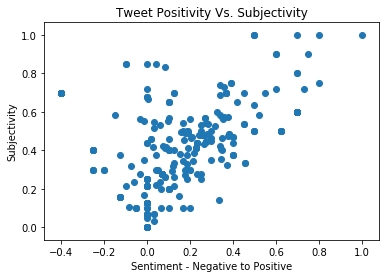

In [11]:
# Question 1 
import matplotlib.pyplot as plt
plt.scatter(df['Sentiment'],df['Subjectivity'])
plt.title('Tweet Positivity Vs. Subjectivity')
plt.xlabel('Sentiment - Negative to Positive')
plt.ylabel('Subjectivity')
plt.show()
# Results: The more Subjective, The more Positive

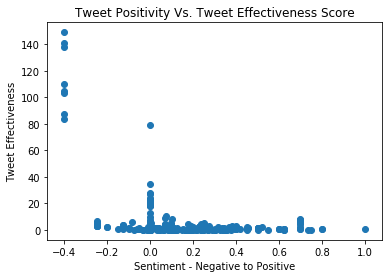

In [12]:
plt.scatter(df['Sentiment'],df['tweet_effectiveness'])
plt.xlabel('Sentiment - Negative to Positive')
plt.ylabel('Tweet Effectiveness')
plt.title('Tweet Positivity Vs. Tweet Effectiveness Score')
plt.show()
# Results More like a negative correlation

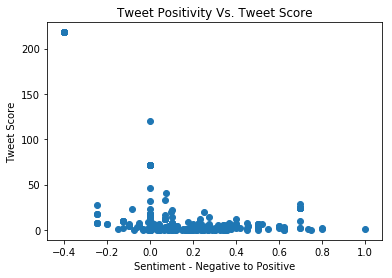

-0.36236269876792576

In [13]:
plt.scatter(df['Sentiment'],df['Tweet_Score'])
plt.xlabel('Sentiment - Negative to Positive')
plt.ylabel('Tweet Score')
plt.title('Tweet Positivity Vs. Tweet Score')
plt.show()
# Results: Again Negative Correlation confirming that Twitter environemnt has more of negative sentiment
df['Sentiment'].corr(df['Tweet_Score'])
# Again quick and dirty correlation analysis

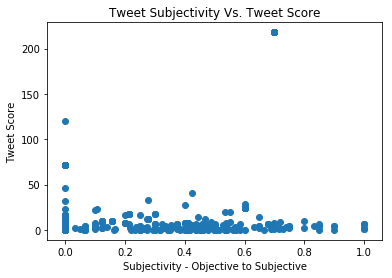

0.06221267178824915

In [14]:
plt.scatter(df['Subjectivity'],df['Tweet_Score'])
plt.xlabel('Subjectivity - Objective to Subjective')
plt.ylabel('Tweet Score')
plt.title('Tweet Subjectivity Vs. Tweet Score')
plt.show()
# Not giving us a lot
df['Subjectivity'].corr(df['Tweet_Score'])

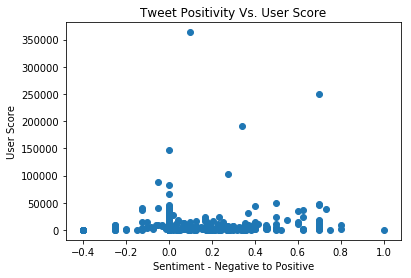

0.09986231850639062

In [15]:
plt.scatter(df['Sentiment'],df['User_Score'])
plt.xlabel('Sentiment - Negative to Positive')
plt.ylabel('User Score')
plt.title('Tweet Positivity Vs. User Score')
plt.show()
# Results: Despite being a negative environemnt, Influencer seems to be much more positive than non-influencers. 
# Results shall be interprete as correlation and not causation, however suggestion of being positive in the enviroment can be made
df['Sentiment'].corr(df['User_Score'])

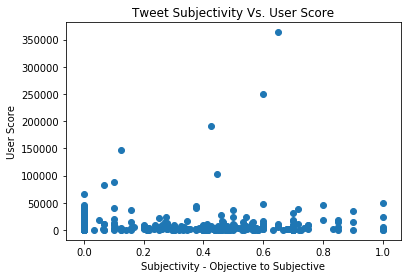

0.04953421170872073

In [16]:
plt.scatter(df['Subjectivity'],df['User_Score'])
plt.xlabel('Subjectivity - Objective to Subjective')
plt.ylabel('User Score')
plt.title('Tweet Subjectivity Vs. User Score')
plt.show()
# Not giving us a lot
df['Subjectivity'].corr(df['User_Score'])

In [46]:
# Giving samle of influencers tweets - per our agreement with twitter we are not using user_id etc so more focusing on tweets
df.sort_values('User_Score').tail(10)


,id,tweets,likes,retweets,Tweet_Score,time,followers,friends,User_Score,location,key_word,inclakeontario,Sentiment,Subjectivity,tweet_effectiveness
68,1465350383971323907,RT demsabroadbe: Today is a good day to follow...,0.0,12.0,24.0,2021-11-29 16:02:11,28098.0,9581.0,47260.0,Worldwide! 🇺🇸🌍,volunteer+litter+Ontario,0.0,0.700000,0.600000,5.134246
266,"1,466,186,799,907,280,000",RT artandseek: Oncor has gifted the CityOfDall...,0.0,3.0,6.0,2021-12-01 23:25:48,37141.0,5839.0,48819.0,Texas,donation lake,0.0,0.500000,1.000000,1.279703
251,"1,466,488,859,211,050,000",A $250 donation was made by the Auditor John P...,0.0,0.0,0.0,2021-12-02 19:26:04,63424.0,1774.0,66972.0,"Munster, IN",donation lake,0.0,0.000000,0.000000,0.000000
153,1463586991862423562,The state said it will address site-wide conta...,0.0,0.0,0.0,2021-11-24 19:15:05,79156.0,1456.0,82068.0,Buffalo,lake cleanup,0.0,0.000000,0.066667,0.000000
154,1463579011150454796,RT OPP_COMM_WR: ROAD CLOSURE: Bruce Rd 86 betw...,0.0,2.0,4.0,2021-11-24 18:43:22,86880.0,803.0,88486.0,"London, ON",lake cleanup,0.0,-0.050000,0.100000,0.808591
292,"1,466,057,642,133,130,000",In honor of this week’s GivingTuesday celebrat...,6.0,4.0,14.0,2021-12-01 14:52:34,79813.0,11220.0,102253.0,"Washington, D.C.",donation lake,0.0,0.273674,0.444886,2.794592
218,"1,466,384,150,768,740,000",Our journey towards a greener future continues...,6.0,1.0,8.0,2021-12-02 12:30:00,146412.0,117.0,146646.0,India,A Greener Future,0.0,0.000000,0.125000,1.548506
237,"1,466,360,508,647,420,000",Many OilAndGas companies in Aberdeen and the N...,3.0,1.0,5.0,2021-12-02 10:56:03,187761.0,1274.0,190309.0,Scotland,A Greener Future,0.0,0.339286,0.424107,0.947067
101,1464939677962670083,RT demsabroadbe: Today is a good day to follow...,0.0,12.0,24.0,2021-11-28 12:50:11,85117.0,82896.0,250909.0,www.5calls.org,volunteer+litter+Ontario,0.0,0.700000,0.600000,4.444843
162,1463490016668172294,Real change is possible. https://t.co/6OY9WXKlD5,10.0,2.0,14.0,2021-11-24 12:49:44,360887.0,1350.0,363587.0,"Santa Fe, NM",lake cleanup,0.0,0.100000,0.650000,2.517710


In [49]:
# More analysis on Donation with text mining and query keywords.
df['Donation'] = 0
F_Text='Donation'
ftext=('Donation','donated' , 'Donate', 'donors', 'donation')
df.loc[(df.tweets.str.contains('|'.join(ftext), na=False) | df.key_word.str.contains(F_Text)) ,'Donation'] = 1


In [53]:
#test
df[df['Donation']==1].head(10)

,id,tweets,likes,retweets,Tweet_Score,time,followers,friends,User_Score,location,key_word,inclakeontario,Sentiment,Subjectivity,tweet_effectiveness,Donation
17,1466225304221806592,"""create good memories today so that u can have...",1.0,2.0,5.0,2021-12-02 01:58:48,954.0,43.0,1040.0,Ratia Haryana,volunteer+litter+Ontario,0.0,0.375000,0.475000,1.657257,1
250,"1,466,513,445,973,630,000",Huge thank you to The Lake House Charitable Fo...,1.0,1.0,3.0,2021-12-02 21:03:46,1498.0,804.0,3106.0,York,donation lake,0.0,0.337500,0.737500,0.859057,1
251,"1,466,488,859,211,050,000",A $250 donation was made by the Auditor John P...,0.0,0.0,0.0,2021-12-02 19:26:04,63424.0,1774.0,66972.0,"Munster, IN",donation lake,0.0,0.000000,0.000000,0.000000,1
252,"1,466,486,788,281,830,000",Picture This: Grotto Pizza in Harveys Lake is ...,0.0,0.0,0.0,2021-12-02 19:17:50,1351.0,504.0,2359.0,"Wilkes-Barre, PA",donation lake,0.0,0.083333,0.411111,0.000000,1
253,"1,466,459,191,556,840,000",Earlier this week we made a $1000 donation to ...,1.0,0.0,1.0,2021-12-02 17:28:11,1545.0,1225.0,3995.0,British Columbia,donation lake,0.0,0.350000,0.575000,0.277661,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,"1,465,784,242,747,570,000",RT KenKalthoffNBC5: .Johnson4Dallas announces ...,0.0,6.0,12.0,2021-11-30 20:46:11,203.0,1038.0,2279.0,"Fort Worth, Texas",donation lake,0.0,0.000000,0.000000,3.573828,1
343,"1,465,783,442,365,360,000",.Johnson4Dallas announces 110 acre park land d...,20.0,6.0,32.0,2021-11-30 20:43:00,9681.0,5109.0,19899.0,"Dallas, Texas",donation lake,0.0,0.000000,0.000000,7.443884,1
344,"1,465,782,717,803,470,000",Lake Odessa Community Library https://t.co/cd...,0.0,0.0,0.0,2021-11-30 20:40:07,1532.0,295.0,2122.0,NaN,donation lake,0.0,-0.012500,0.350000,0.000000,1
345,"1,465,782,467,932,160,000","Grew up on the lake, what a wonderful donation...",1.0,0.0,1.0,2021-11-30 20:39:07,2.0,101.0,204.0,"Loveland, OH",donation lake,0.0,1.000000,1.000000,0.432970,1


In [58]:
# Donation tweets having lower scores for all of the KPIs - this is correlation not causation
df.groupby('Donation')[['Tweet_Score','User_Score','tweet_effectiveness','Sentiment','Subjectivity']].mean()

,Tweet_Score,User_Score,tweet_effectiveness,Sentiment,Subjectivity
Donation,,,,,
0,11.959259,11567.440741,3.87398,0.151799,0.321736
1,6.394366,7652.619718,1.78326,0.117638,0.293397


In [ ]:
# For Webapp consumption https://greentweets.netlify.app/
df.to_csv(r'C:\Users\Taha\Desktop\Hackathon\tweets_modified.csv', index = False)